# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions
print(f'Data Cleaning and EDA Assignment')
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')


Data Cleaning and EDA Assignment
Pandas version: 2.2.2
Numpy version: 1.26.4


## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the file from Google Drive
df_raw = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', delimiter=';')

Mounted at /content/drive


<ipython-input-4-5adf0c9ed315>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', delimiter=';')


In [ ]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [ ]:
#Describe all columns
print(df_raw.describe(include='all'))


             Date      Time Global_active_power Global_reactive_power  \
count     2075259   2075259             2075259               2075259   
unique       1442      1440                6534                   896   
top     6/12/2008  17:24:00                   ?                 0.000   
freq         1440      1442               25979                472786   
mean          NaN       NaN                 NaN                   NaN   
std           NaN       NaN                 NaN                   NaN   
min           NaN       NaN                 NaN                   NaN   
25%           NaN       NaN                 NaN                   NaN   
50%           NaN       NaN                 NaN                   NaN   
75%           NaN       NaN                 NaN                   NaN   
max           NaN       NaN                 NaN                   NaN   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
count   2075259          2075259        20

Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [ ]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [ ]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [ ]:


# Now Combine 'Date' and 'Time' columns into 'Datetime'
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Drop the original 'Date' and 'Time' columns
df = df.drop(['Date', 'Time'], axis=1)

# Convert the rest of the columns to numeric, coercing errors to NaN
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Print the data

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [ ]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [ ]:
print(df['Time'])


0          17:24:00
1          17:25:00
2          17:26:00
3          17:27:00
4          17:28:00
             ...   
2075254    20:58:00
2075255    20:59:00
2075256    21:00:00
2075257    21:01:00
2075258    21:02:00
Name: Time, Length: 2075259, dtype: object


In [ ]:
print(df['Date'])

0          2006-12-16
1          2006-12-16
2          2006-12-16
3          2006-12-16
4          2006-12-16
              ...    
2075254    2010-11-26
2075255    2010-11-26
2075256    2010-11-26
2075257    2010-11-26
2075258    2010-11-26
Name: Date, Length: 2075259, dtype: object


In [ ]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]
Date,object
Time,object


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [ ]:
df.Date[0]

datetime.date(2006, 12, 16)

In [ ]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [ ]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

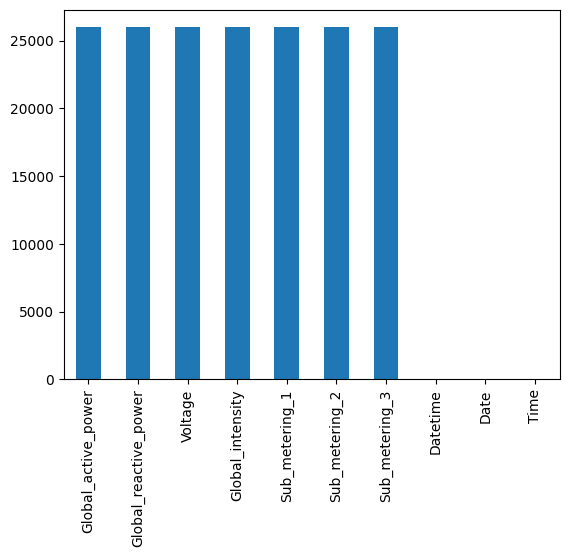

In [ ]:
df.isna().sum().plot.bar()

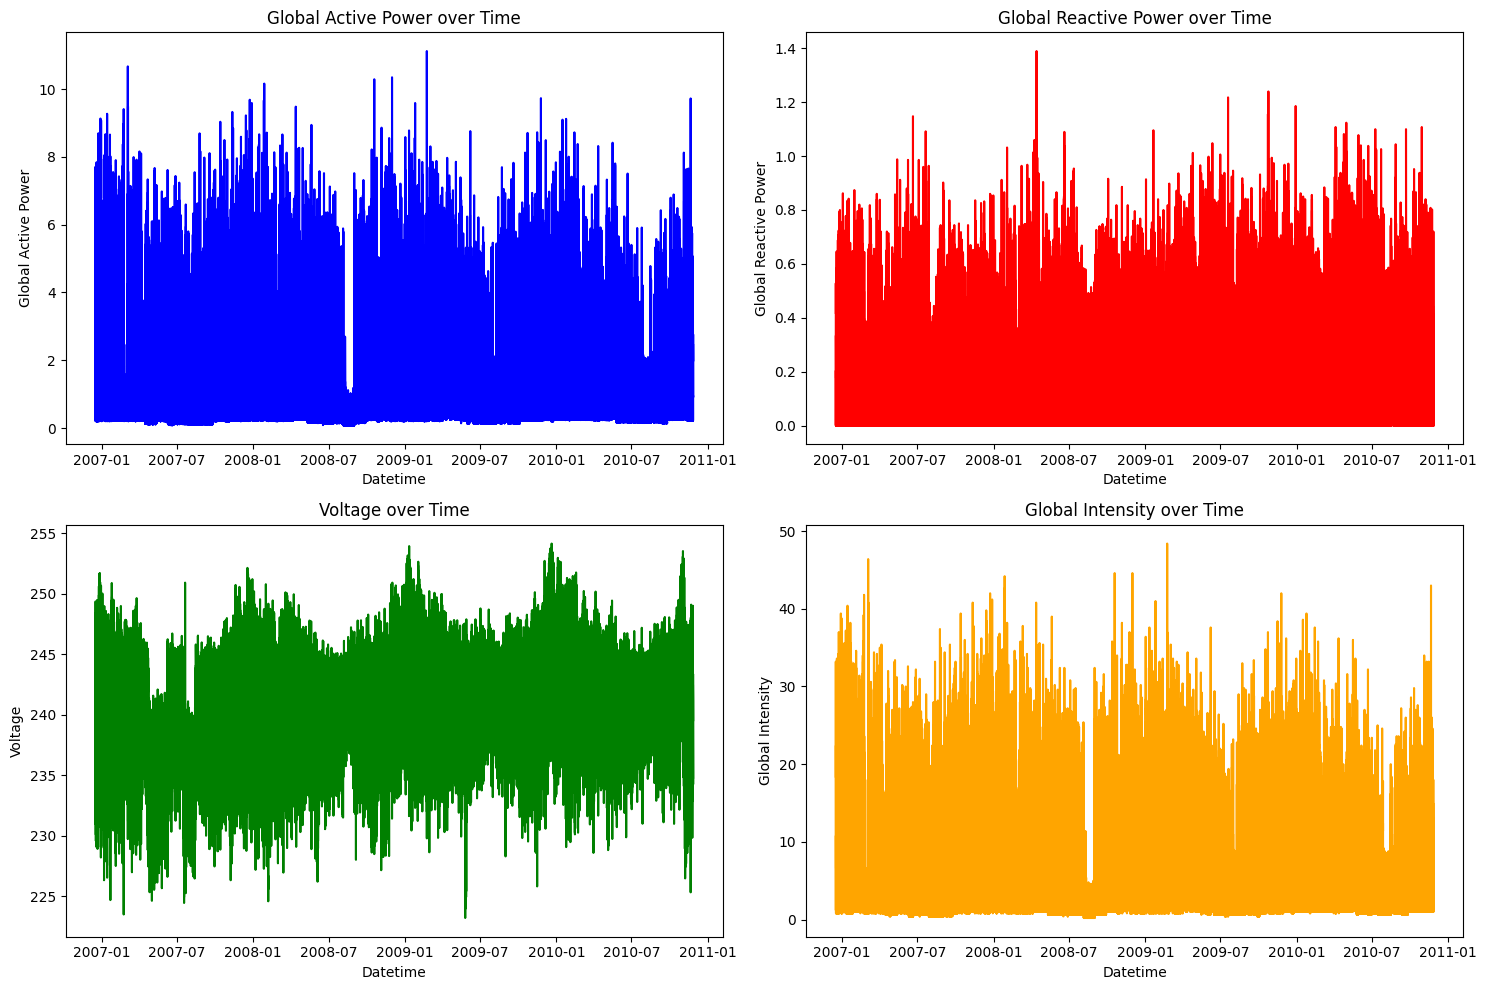

In [ ]:
# Plot the important features
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Global Active Power vs. Datetime
axes[0, 0].plot(df['Datetime'], df['Global_active_power'], color='blue')
axes[0, 0].set_title('Global Active Power over Time')
axes[0, 0].set_xlabel('Datetime')
axes[0, 0].set_ylabel('Global Active Power')

# Plot 2: Global Reactive Power vs. Datetime
axes[0, 1].plot(df['Datetime'], df['Global_reactive_power'], color='red')
axes[0, 1].set_title('Global Reactive Power over Time')
axes[0, 1].set_xlabel('Datetime')
axes[0, 1].set_ylabel('Global Reactive Power')

# Plot 3: Voltage vs. Datetime
axes[1, 0].plot(df['Datetime'], df['Voltage'], color='green')
axes[1, 0].set_title('Voltage over Time')
axes[1, 0].set_xlabel('Datetime')
axes[1, 0].set_ylabel('Voltage')

# Plot 4: Global Intensity vs. Datetime
axes[1, 1].plot(df['Datetime'], df['Global_intensity'], color='orange')
axes[1, 1].set_title('Global Intensity over Time')
axes[1, 1].set_xlabel('Datetime')
axes[1, 1].set_ylabel('Global Intensity')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

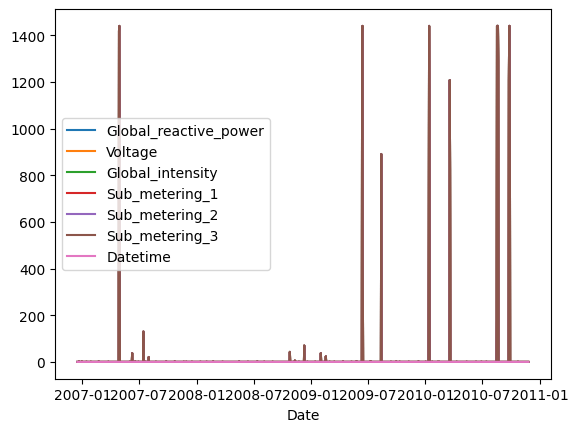

In [ ]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A:
The plot reveals that missing data is not randomly distributed across all the columns. Rather it seems to be clustered in bursts on certain days, rather than uniformly distributed. Some days have no missing data for the plotted features, while other days have a high concentration of missing data for all or most of the columns.  This indicates that there might be some systematic reason for the missing data, such as issues with the data collection process or sensor malfunction on specific dates, rather than simply random occurrences of missing values.

From the processed dataset, following missing data patterns is observed

**Random Missing Values:**

Some columns have sporadic missing values.

These missing values do not follow a strict pattern but appear intermittently.

**Gaps in Time-Series Data:**

If entire time periods (e.g., days) are missing.

**Column-Specific Missing Data:**

Certain columns, like Global_active_power or Sub_metering_1, 2, 3, may have more missing values than others.



**Effect on Analysis:**

Missing data can affect trend analysis and forecasting models.
If too much data is missing in a particular time period,

it may need imputation **(e.g., forward-fill, mean imputation, or interpolation**).


**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: **1. Forward Fill (Propagation)**
Method: Replace missing values with the most recent available data.
Use Case: Works well for continuous time series data where values don’t change drastically (e.g., power consumption).
Pros: Maintains trend continuity.
Cons: Not ideal if there are long gaps, as it assumes no change.

**Interpolation (Linear, Polynomial, or Time-based)**
Method: Estimate missing values based on neighboring data points.
Use Case: Best for data with smooth trends, such as power consumption over time.
Pros: More accurate than forward fill, as it accounts for trends.
Cons: Can introduce errors if the data is highly volatile.

**Mean/Median Imputation**
Method: Replace missing values with the mean or median of the column.
Use Case: Best for columns with random missing values that don't depend on time.
Pros: Simple and effective for numerical features.
Cons: Not ideal for time-series data, as it ignores trends.

 **Dropping Missing Data**
Method: Remove rows or columns with missing values.
Use Case: Useful when missing data is minimal

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [ ]:
#clean up missing data here

In [ ]:


# Example using removal:
df.dropna(inplace=True) #Removes rows with any NaN values



In [ ]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:
 1.  **Global_active_power:** This is the total active power consumed by the household. It's a fundamental metric for energy consumption and serves as a baseline for understanding overall energy usage patterns over time.
 2.  **Global_reactive_power:** This represents the non-working power in the household's electrical system.  Comparing it to Global_active_power over time can reveal insights into the efficiency of energy usage. A higher reactive power relative to active power could indicate inefficiencies in the electrical system.
 3.  **Voltage:**  Voltage fluctuations can affect appliance performance and overall energy efficiency. Monitoring voltage over time helps to identify potential issues in the power supply.  Combining this with observations of active and reactive power could reveal how voltage changes affect energy usage.
 4.  **Global_intensity:** This is the current intensity in the household electrical system.  Changes in intensity, when viewed alongside voltage and active power, can provide information about the load on the household's electrical grid and potential correlations between these factors.


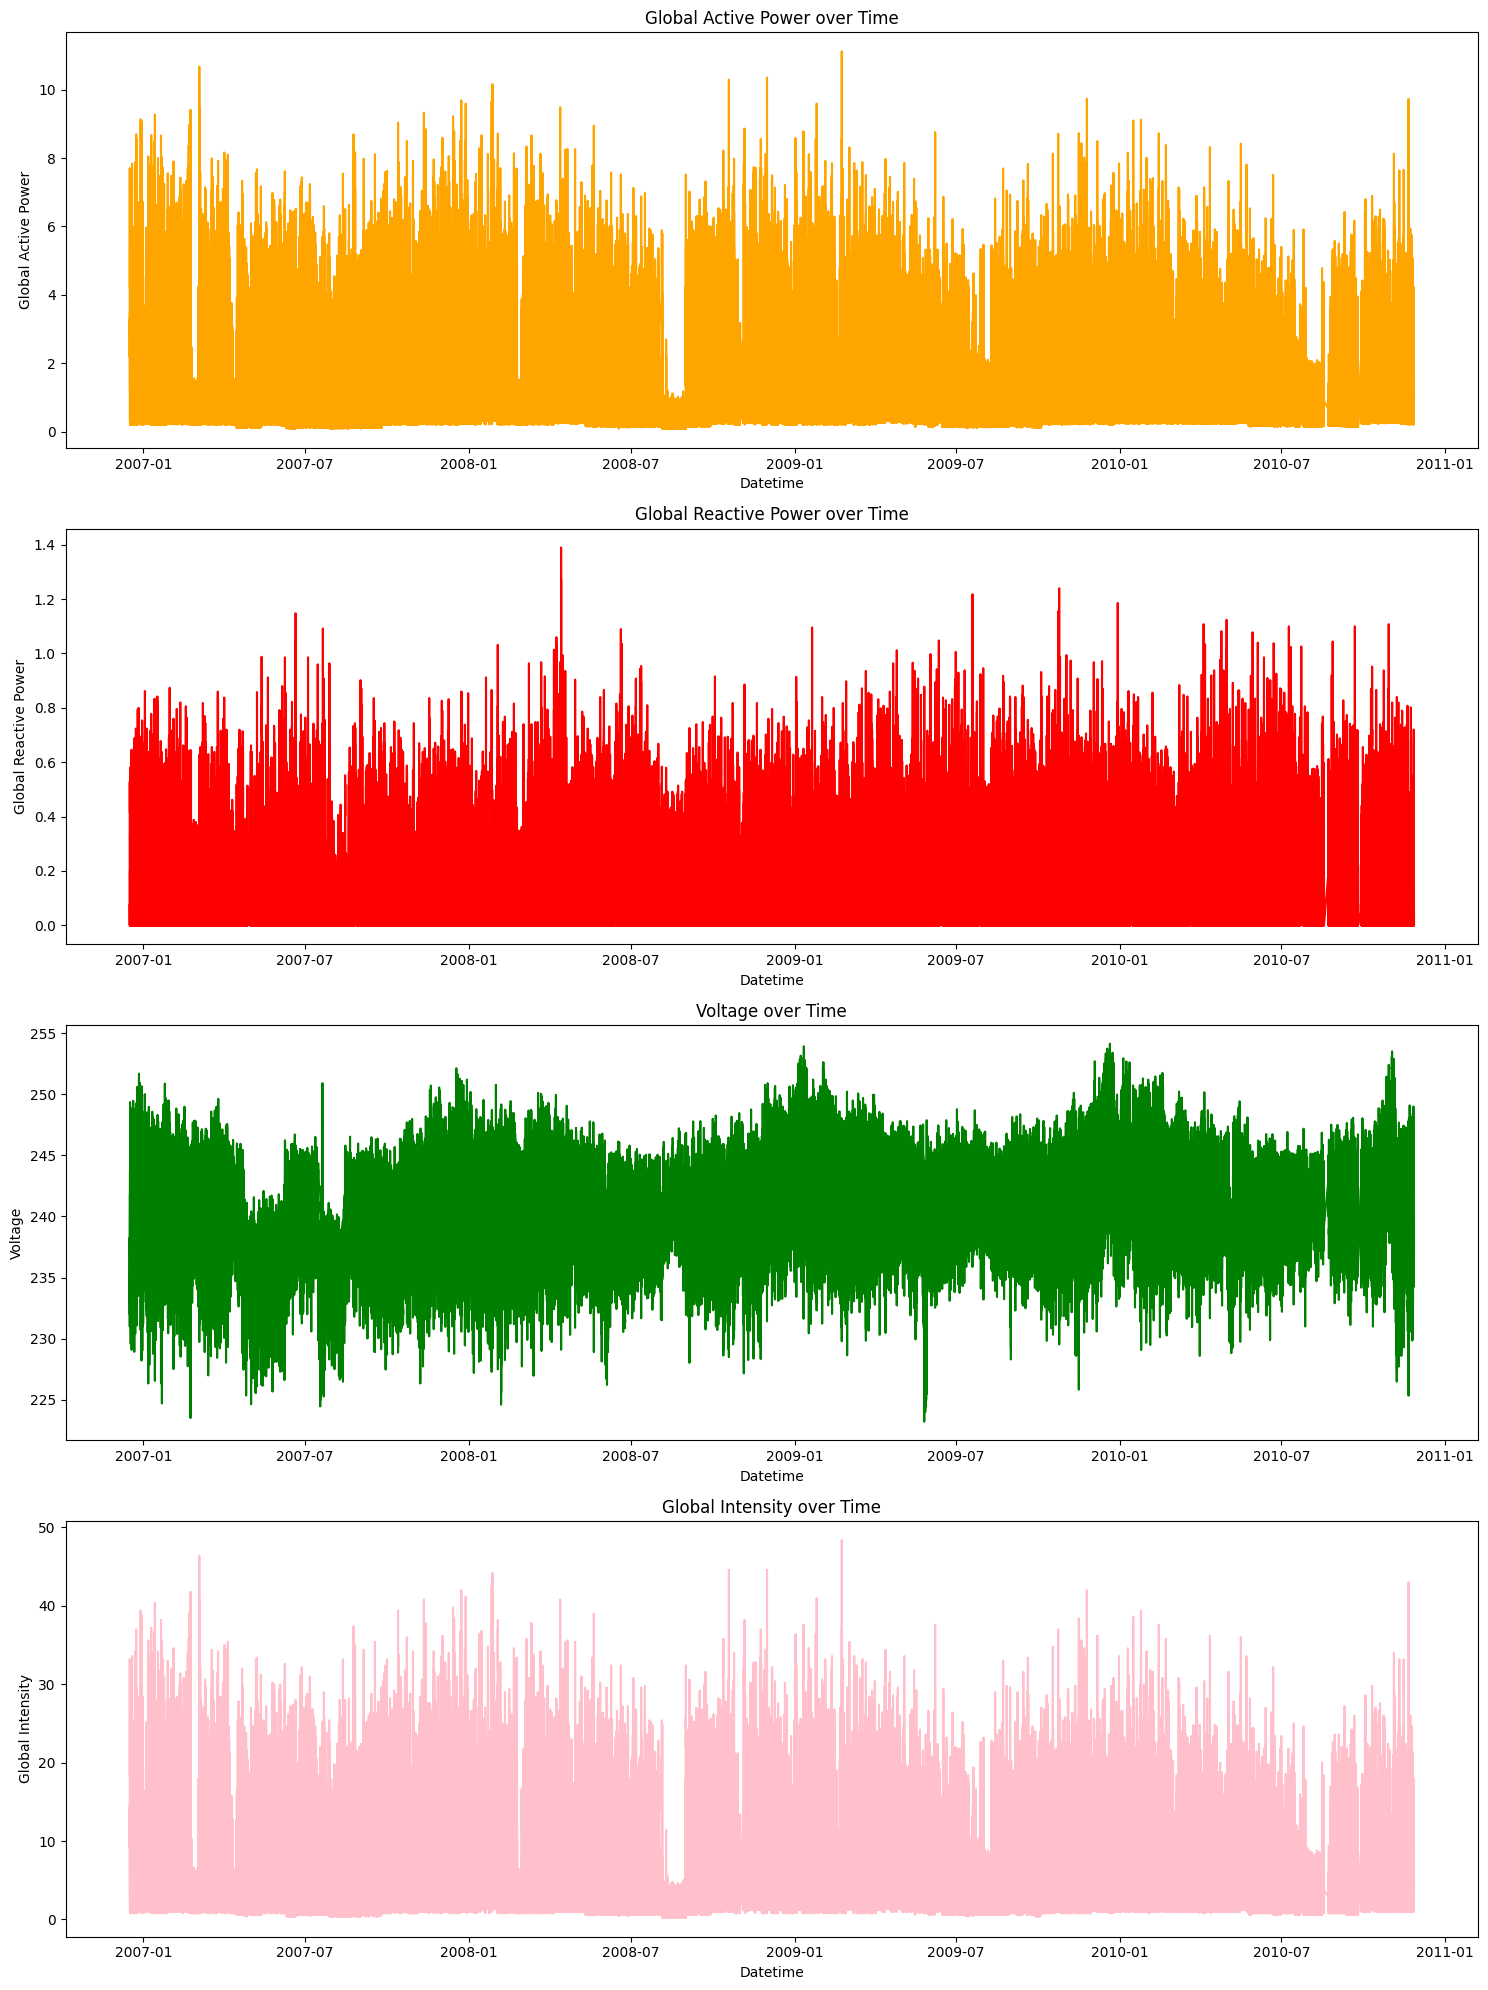

In [ ]:


import matplotlib.pyplot as plt

# it has a 'Datetime' column
# and the four columns you selected: 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# Plot 1: Global Active Power vs. Datetime
axes[0].plot(df['Datetime'], df['Global_active_power'],color='orange')
axes[0].set_title('Global Active Power over Time')
axes[0].set_xlabel('Datetime')
axes[0].set_ylabel('Global Active Power')

# Plot 2: Global Reactive Power vs. Datetime
axes[1].plot(df['Datetime'], df['Global_reactive_power'],color='red')
axes[1].set_title('Global Reactive Power over Time')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Global Reactive Power')

# Plot 3: Voltage vs. Datetime
axes[2].plot(df['Datetime'], df['Voltage'],color='green')
axes[2].set_title('Voltage over Time')
axes[2].set_xlabel('Datetime')
axes[2].set_ylabel('Voltage')

# Plot 4: Global Intensity vs. Datetime
axes[3].plot(df['Datetime'], df['Global_intensity'],color='pink')
axes[3].set_title('Global Intensity over Time')
axes[3].set_xlabel('Datetime')
axes[3].set_ylabel('Global Intensity')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

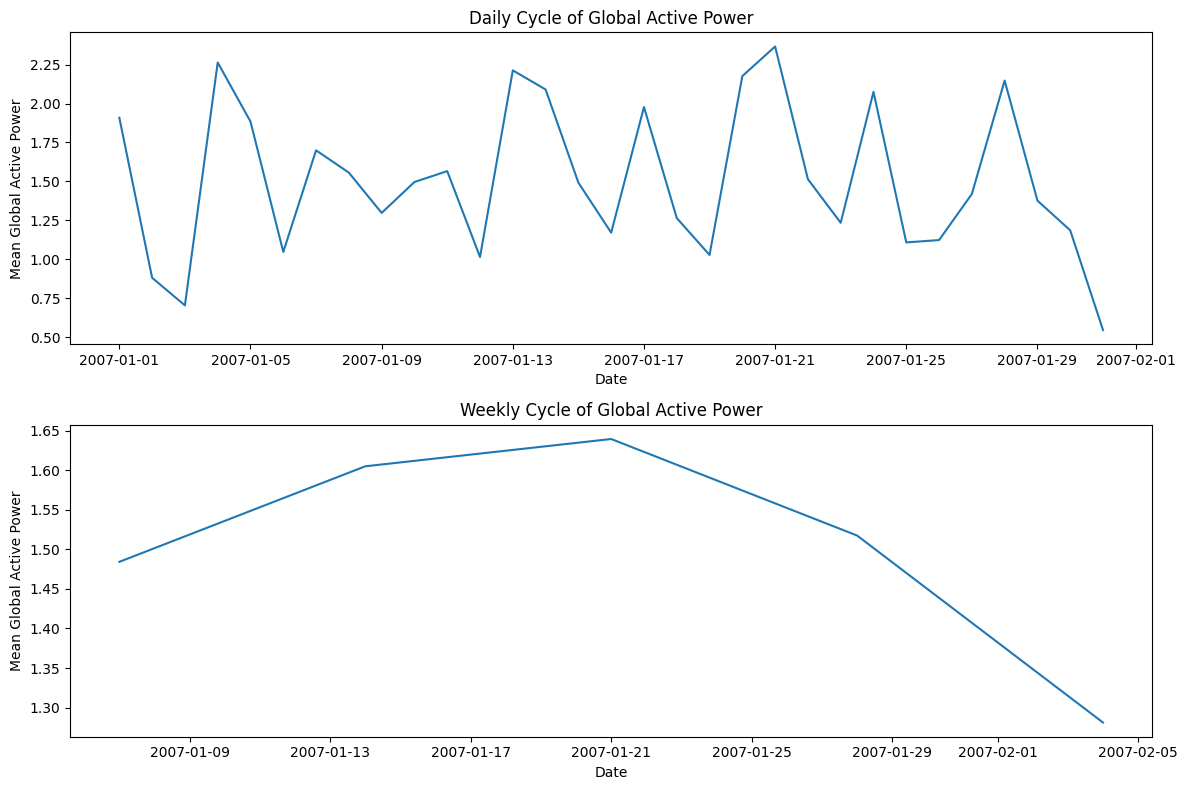

In [ ]:
#  Daily and Weekly Cycles: for 1 month

import pandas as pd
import matplotlib.pyplot as plt


# If not, load your data and create the 'df' DataFrame here

# Filter data for one month (e.g., January 2007)
# Adjust the start and end dates as needed
start_date = '2007-01-01'
end_date = '2007-01-31'

df_month = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]



daily_data = df_month.resample('D', on='Datetime')[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].mean()

# Resample to weekly frequency and calculate the mean
# Exclude the 'Date' column from the mean calculation
weekly_data = df_month.resample('W', on='Datetime')[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].mean()



# Create the plots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Daily Cycle
axes[0].plot(daily_data.index, daily_data['Global_active_power'])  # Example: Plot Global_active_power
axes[0].set_title('Daily Cycle of Global Active Power')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean Global Active Power')

# Weekly Cycle
axes[1].plot(weekly_data.index, weekly_data['Global_active_power'])  # Example: Plot Global_active_power
axes[1].set_title('Weekly Cycle of Global Active Power')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Mean Global Active Power')

plt.tight_layout()
plt.show()

In [ ]:



# Filter data for one month (e.g., January 2007)
# Adjust the start and end dates as needed
start_date = '2007-01-01'
end_date = '2007-01-31'

df_month = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]



daily_data = df_month.resample('D', on='Datetime')[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].mean()

# Resample to weekly frequency and calculate the mean
# Exclude the 'Date' column from the mean calculation
weekly_data = df_month.resample('W', on='Datetime')[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].mean()

print("daily data\n")
print(daily_data)

print("\n weekly data\n")
print(weekly_data)


daily data

            Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2007-01-01             1.909031               0.102893  240.128979   
2007-01-02             0.881414               0.132182  241.943778   
2007-01-03             0.704204               0.136617  243.557090   
2007-01-04             2.263481               0.140487  239.750299   
2007-01-05             1.884281               0.120246  240.495764   
2007-01-06             1.047485               0.133464  239.673056   
2007-01-07             1.699736               0.170885  240.902486   
2007-01-08             1.556500               0.144144  239.576951   
2007-01-09             1.297954               0.143922  240.487521   
2007-01-10             1.496389               0.158647  241.027451   
2007-01-11             1.566107               0.159736  241.155687   
2007-01-12             1.014789               0.138292  241.538208   
2007-01-

In [ ]:


import pandas as pd



# Specify the start and end dates for the 10-day period
start_date = '2007-01-01'  # Replace with your desired start date
end_date = '2007-01-10'  # Replace with your desired end date


df_10_days = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

df_10_days

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Date,Time
21996,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,2007-01-01,00:00:00
21997,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,2007-01-01,00:01:00
21998,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,2007-01-01,00:02:00
21999,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,2007-01-01,00:03:00
22000,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,2007-01-01,00:04:00
...,...,...,...,...,...,...,...,...,...,...
34952,0.416,0.314,244.11,2.2,0.0,1.0,0.0,2007-01-09 23:56:00,2007-01-09,23:56:00
34953,0.386,0.294,244.35,2.0,0.0,1.0,0.0,2007-01-09 23:57:00,2007-01-09,23:57:00
34954,0.404,0.298,244.19,2.0,0.0,2.0,0.0,2007-01-09 23:58:00,2007-01-09,23:58:00
34955,0.384,0.294,244.05,2.0,0.0,1.0,0.0,2007-01-09 23:59:00,2007-01-09,23:59:00


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**


A: Visualizing the raw data as time series plots reveals several key characteristics:

1.  **Noisy Data:** The raw data exhibits a high degree of noise and short-term fluctuations. This makes it challenging to discern underlying trends or patterns directly.

2.  **Daily and Weekly Cycles:** There appear to be discernible daily and potentially weekly cycles in the data, especially for global active power.   Weekly patterns could reflect differences in weekday vs. weekend usage.

3.  **Overall Trend (Less Clear):**  While daily and weekly patterns are apparent, it is difficult to observe any long-term trend from the raw data visualizations. The noise obscures the longer-term behavior of energy consumption.

4.  **Missing Data Impact:** The missing data gaps also affect visual interpretation, making it hard to see trends that may have been present in the missing periods.

Because of the inherent noise in the data and the presence of daily and weekly cycles, visualizing raw data alone is not very useful for identifying broader trends or long-term patterns in energy consumption.  Aggregating the data (as is done with monthly averages in the next step) is necessary to reduce noise and clearly reveal underlying trends.  The raw data visualization serves mainly as a first step to understand the data's characteristics before further analysis or aggregation is done.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

<ipython-input-30-6a8a07e6e6a8>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average = df.drop(columns=['Date','Time']).groupby(pd.Grouper(key='Datetime', freq='M')).mean()


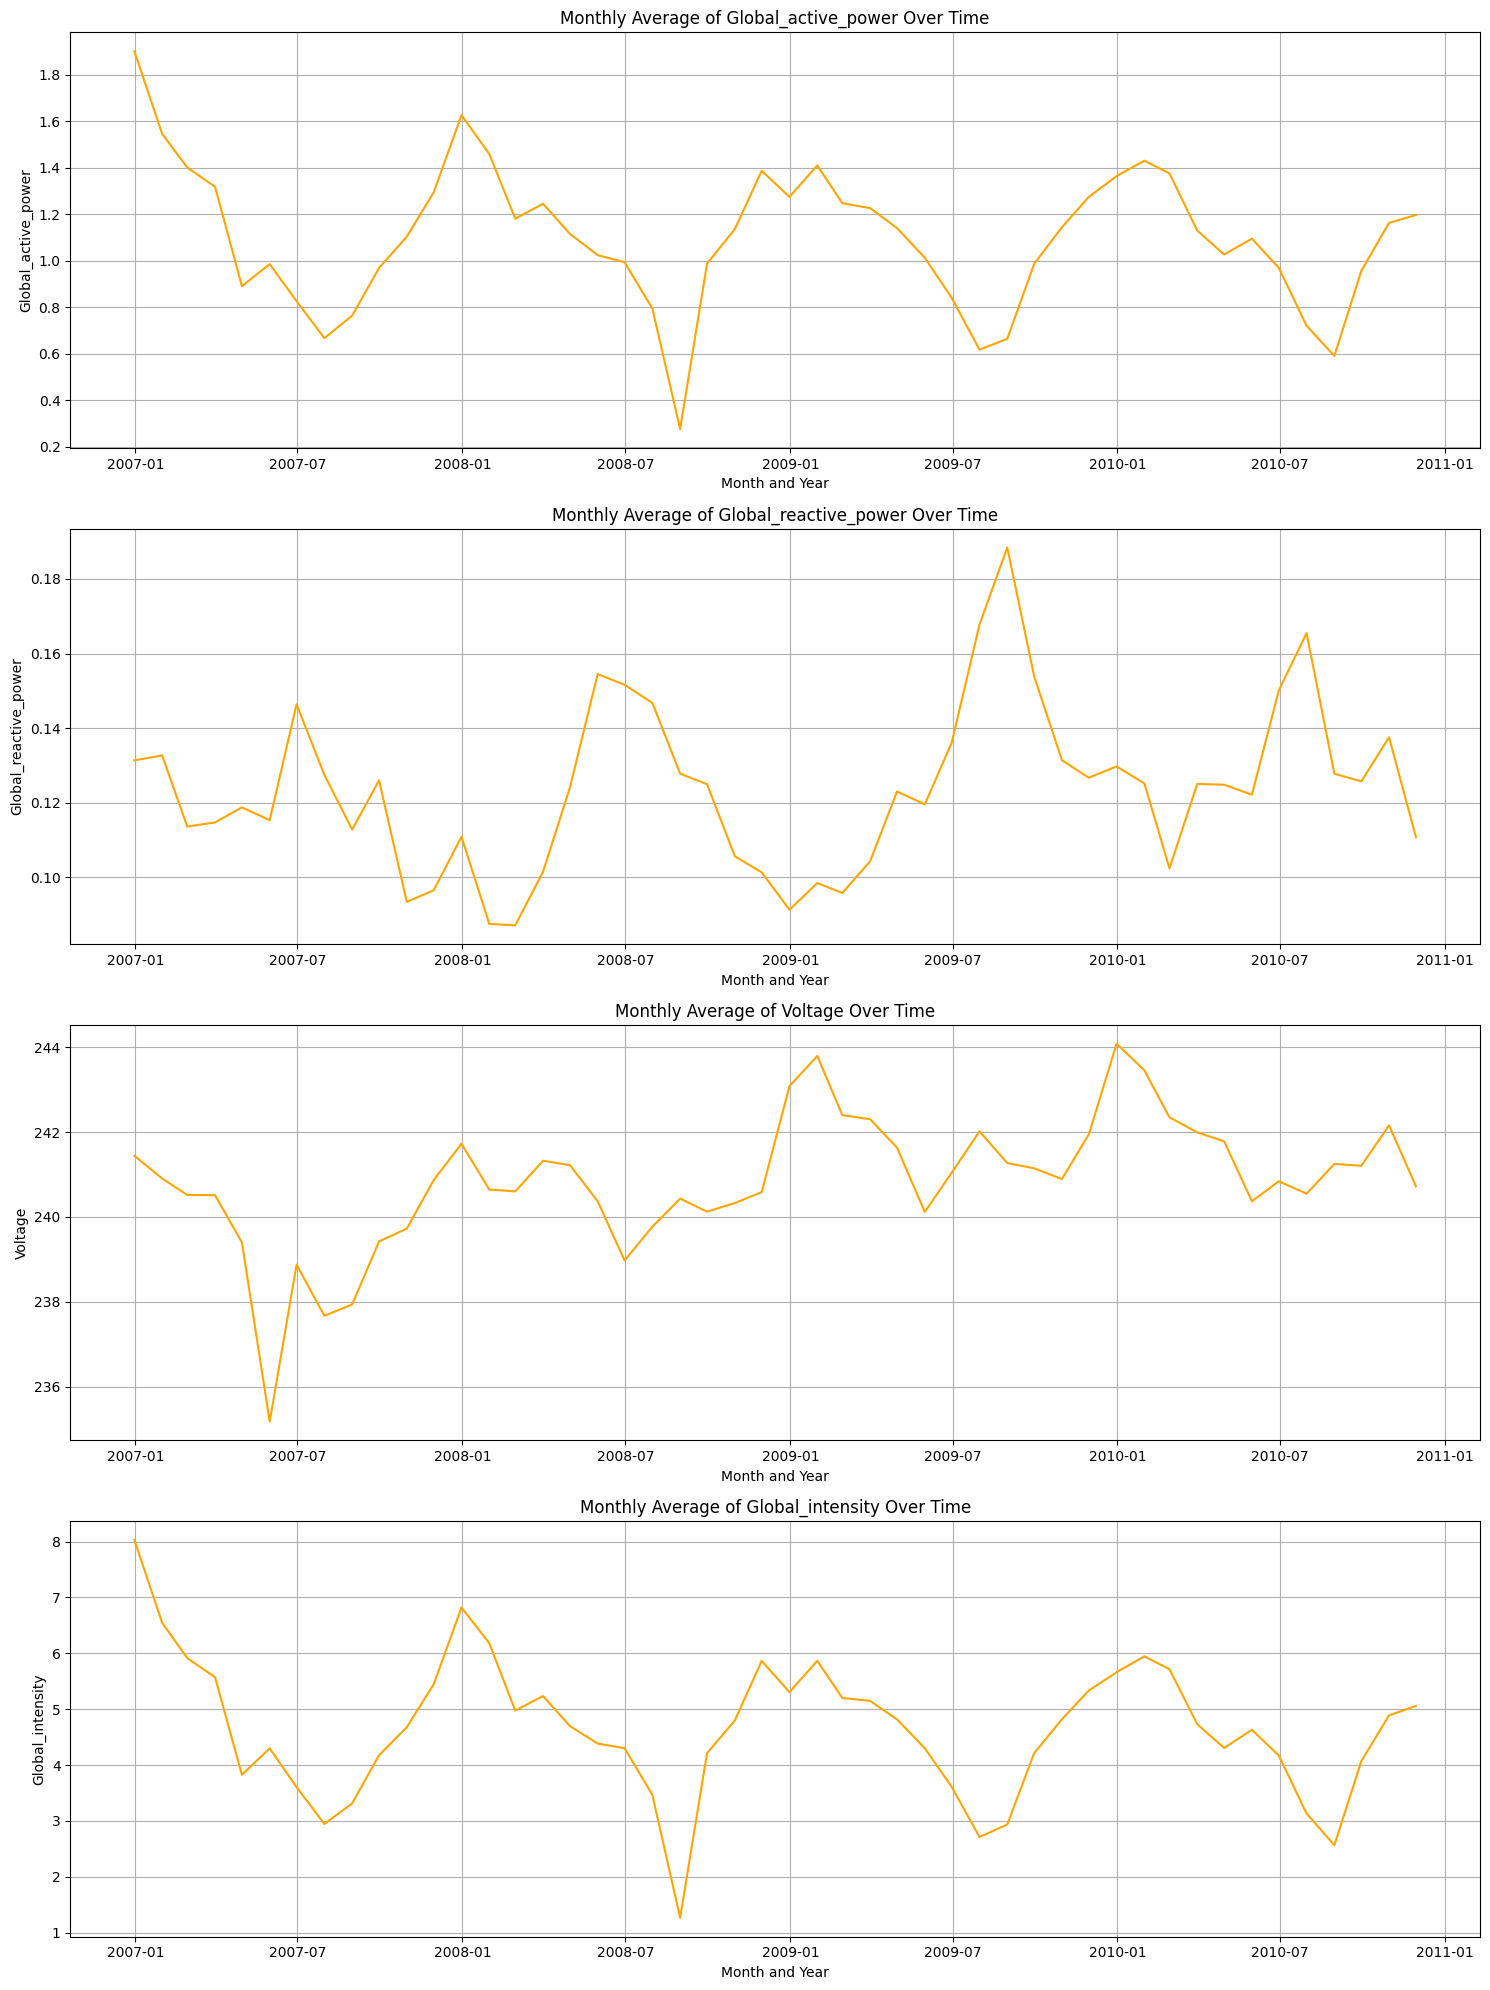

In [ ]:

#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Group data by month and year and calculate the mean for each group, excluding the 'Date' and 'Time' columns
#The Date and Time columns cause errors when calculating the mean, and are not useful for this analysis
monthly_average = df.drop(columns=['Date','Time']).groupby(pd.Grouper(key='Datetime', freq='M')).mean()

# Choose four variables to visualize
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create subplots for each variable
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(15, 5 * len(variables_to_plot)))

# Iterate through the selected variables and plot the monthly averages
for i, variable in enumerate(variables_to_plot):
    axes[i].plot(monthly_average.index, monthly_average[variable],color='orange')
    axes[i].set_title(f'Monthly Average of {variable} Over Time')
    axes[i].set_xlabel('Month and Year')
    axes[i].set_ylabel(variable)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

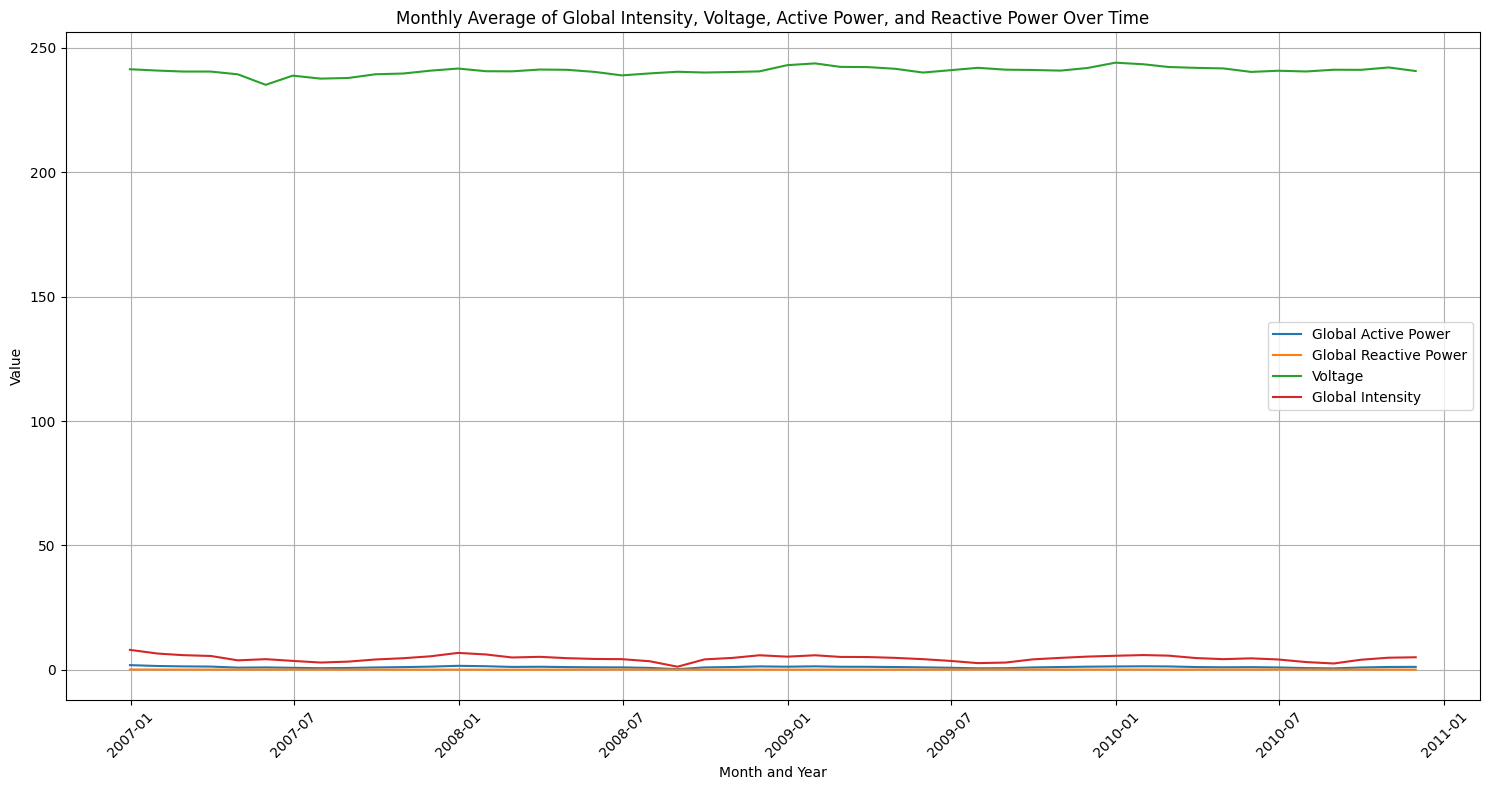

In [ ]:


#the four columns selected: 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'

# Create a single panel plot for monthly average data
plt.figure(figsize=(15, 8))

plt.plot(monthly_average.index, monthly_average['Global_active_power'], label='Global Active Power')
plt.plot(monthly_average.index, monthly_average['Global_reactive_power'], label='Global Reactive Power')
plt.plot(monthly_average.index, monthly_average['Voltage'], label='Voltage')
plt.plot(monthly_average.index, monthly_average['Global_intensity'], label='Global Intensity')

plt.title('Monthly Average of Global Intensity, Voltage, Active Power, and Reactive Power Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:

# Group data by month and year and calculate the mean for each group, excluding the 'Date' and 'Time' columns
#The Date and Time columns cause errors when calculating the mean, and are not useful for this analysis
monthly_average = df.drop(columns=['Date','Time']).groupby(pd.Grouper(key='Datetime', freq='ME')).mean()

In [ ]:
print(monthly_average)


            Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2006-12-31             1.901295               0.131386  241.441125   
2007-01-31             1.546034               0.132676  240.905101   
2007-02-28             1.401084               0.113637  240.519390   
2007-03-31             1.318627               0.114747  240.513469   
2007-04-30             0.891189               0.118778  239.400026   
2007-05-31             0.985862               0.115343  235.178364   
2007-06-30             0.826814               0.146395  238.875530   
2007-07-31             0.667367               0.127481  237.671247   
2007-08-31             0.764186               0.112816  237.937241   
2007-09-30             0.969318               0.126011  239.424108   
2007-10-31             1.103911               0.093444  239.725826   
2007-11-30             1.294473               0.096553  240.869262   
2007-12-31          

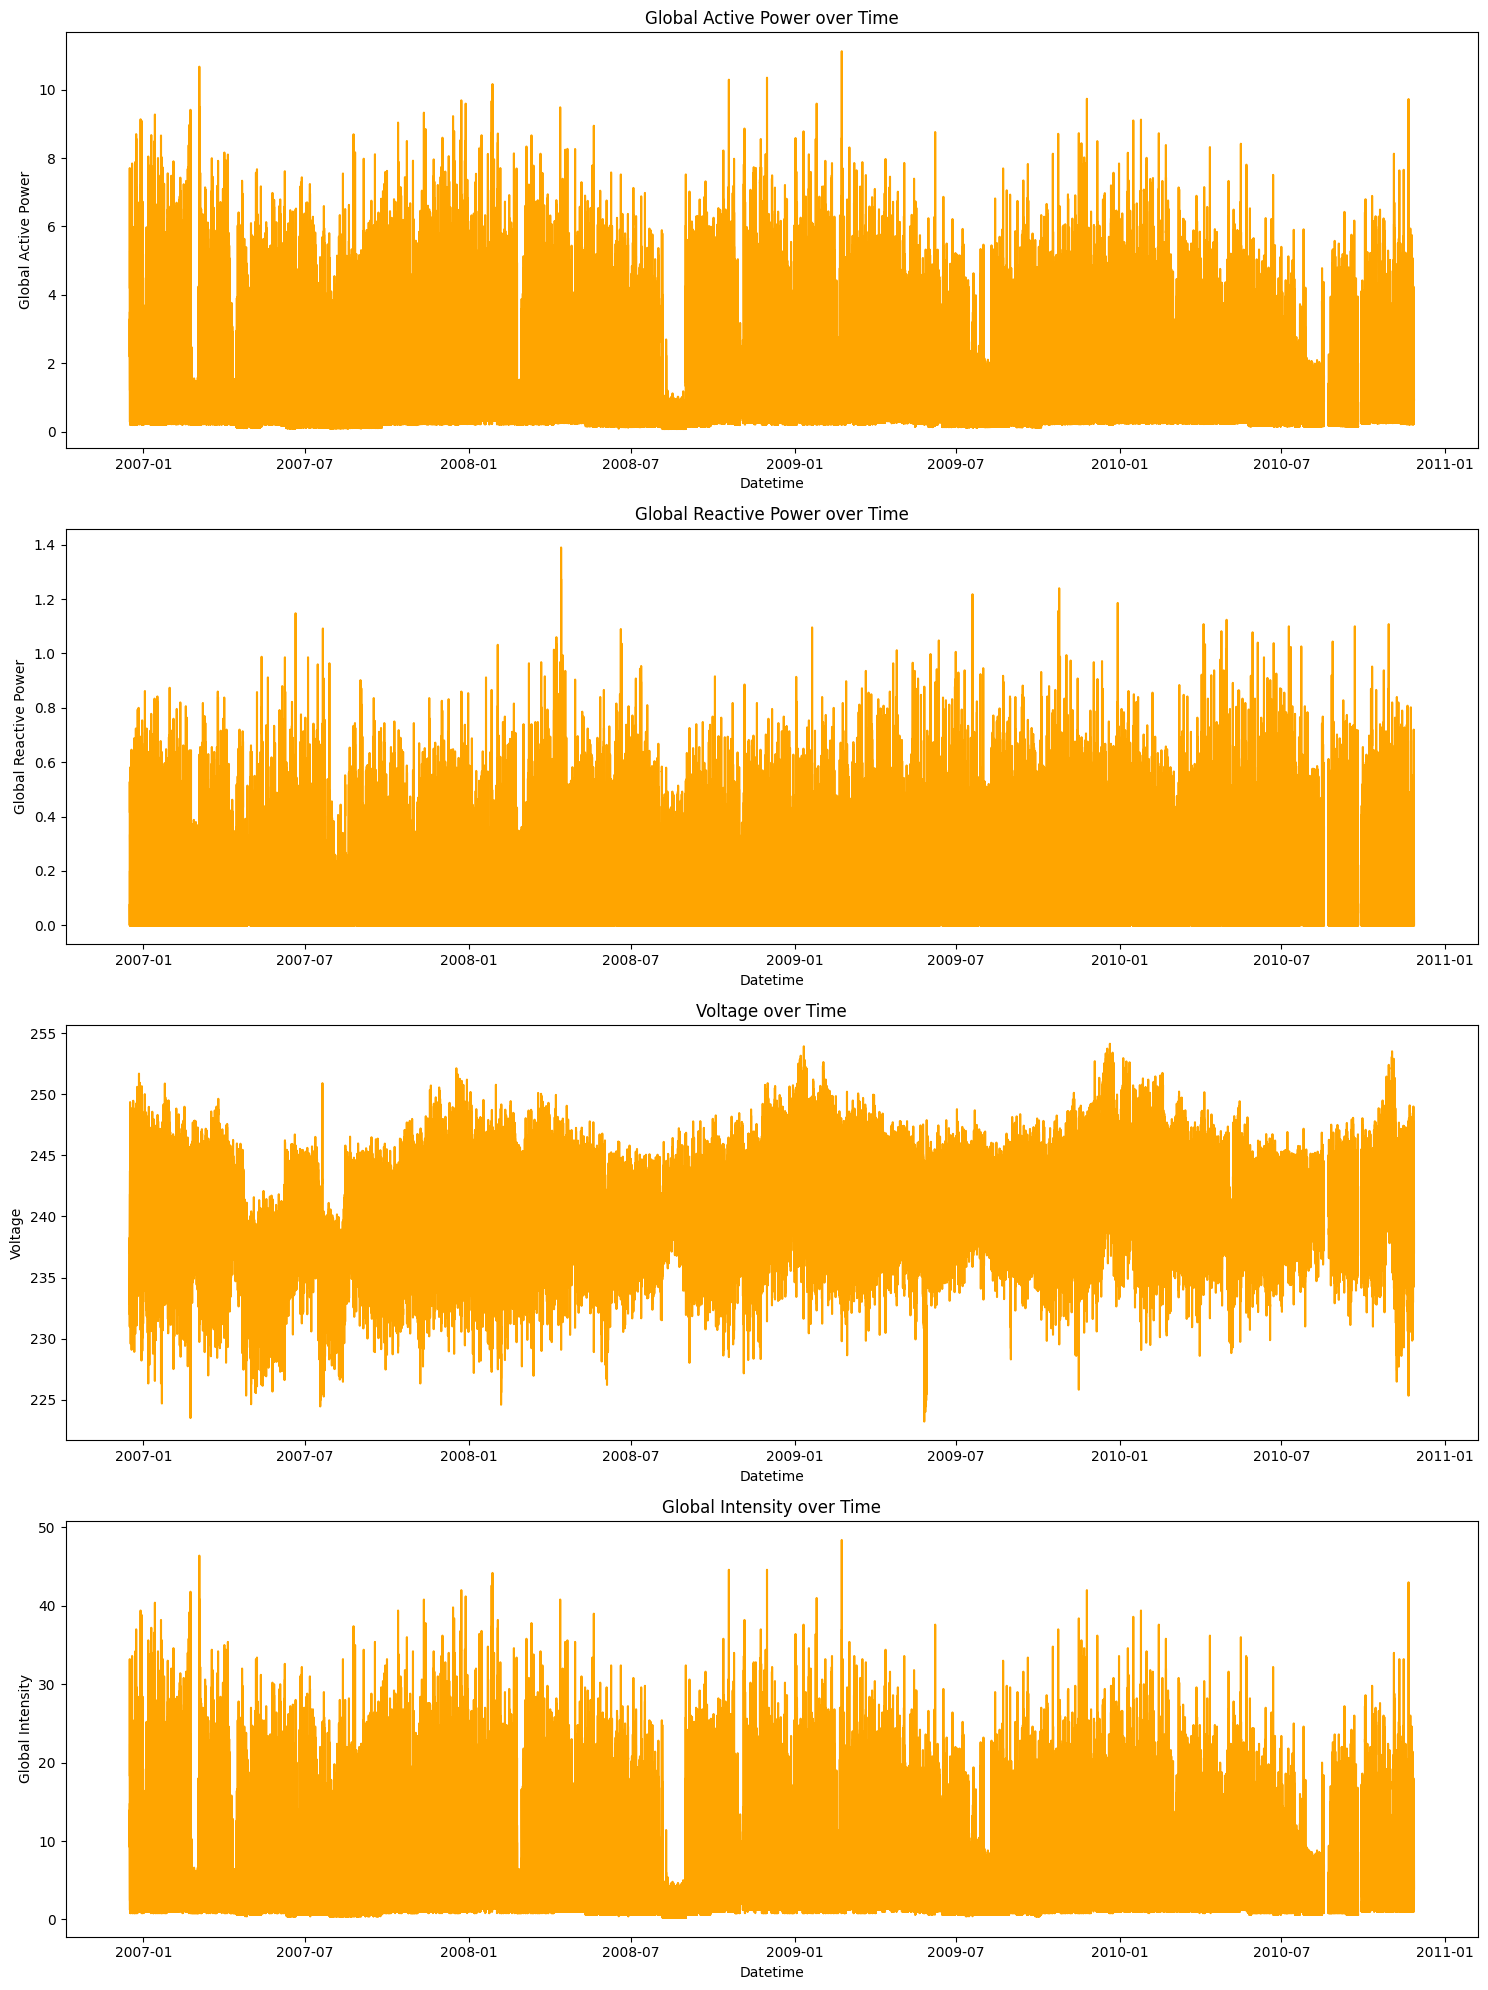

In [ ]:



# and the four columns you selected: 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# Plot 1: Global Active Power vs. Datetime
axes[0].plot(df['Datetime'], df['Global_active_power'],color='orange')
axes[0].set_title('Global Active Power over Time')
axes[0].set_xlabel('Datetime')
axes[0].set_ylabel('Global Active Power')

# Plot 2: Global Reactive Power vs. Datetime
axes[1].plot(df['Datetime'], df['Global_reactive_power'],color='orange')
axes[1].set_title('Global Reactive Power over Time')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Global Reactive Power')

# Plot 3: Voltage vs. Datetime
axes[2].plot(df['Datetime'], df['Voltage'],color='orange')
axes[2].set_title('Voltage over Time')
axes[2].set_xlabel('Datetime')
axes[2].set_ylabel('Voltage')

# Plot 4: Global Intensity vs. Datetime
axes[3].plot(df['Datetime'], df['Global_intensity'],color='orange')
axes[3].set_title('Global Intensity over Time')
axes[3].set_xlabel('Datetime')
axes[3].set_ylabel('Global Intensity')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A:

From the monthly resampled data and correlation matrix, we observe the following:

1. Identified Patterns in Monthly Trends
Global Active Power & Global Intensity show a strong similarity in their monthly trends.
Voltage is relatively stable but exhibits minor fluctuations.
Global Reactive Power has an inverse relationship with Global Active Power.
**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**


Smoother Trends:
The moving average removes short-term fluctuations, making long-term patterns more visible.
Lagging Effect:
The moving average introduces a lag in the data, as it is based on past values.
Better Visibility of Seasonal Changes:
Helps in identifying gradual increases or decreases over time.

**Moving Average**

Example: 30-Day Simple Moving Average
Let's say we want to calculate the 30-day SMA for a stock on day 30. We'll use the closing prices for the last 30 days.

Given Data:

Day 1 (oldest): $100

Day 2: $102

Day 3: $101

...

Day 28: $105

Day 29: $106

Day 30 (most recent): $104

**Formula:**

SMA₃₀ = (X₃₀ + X₂₉ + X₂₈ + ... + X₂ + X₁) / 30
Where X₃₀ is the price on day 30, X₂₉ is the price on day 29, and so on.

**Calculation:**
Let's assume the sum of all 30 days' prices is $3,120.
SMA₃₀ = $3,120 / 30 = $104

**Interpretation:**
The 30-day Simple Moving Average is $104. This means that, on average, the stock price over the last 30 days was $104.

**Moving to the Next Day:**
On day 31, we would drop the oldest price (from day 1) and add the new price from day 31. Then we'd recalculate the average using the same formula.
This example demonstrates how the SMA "moves" by continuously updating with new data while maintaining a consistent look-back period of 30 days.

<ipython-input-33-df4b7c5cedc0>:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


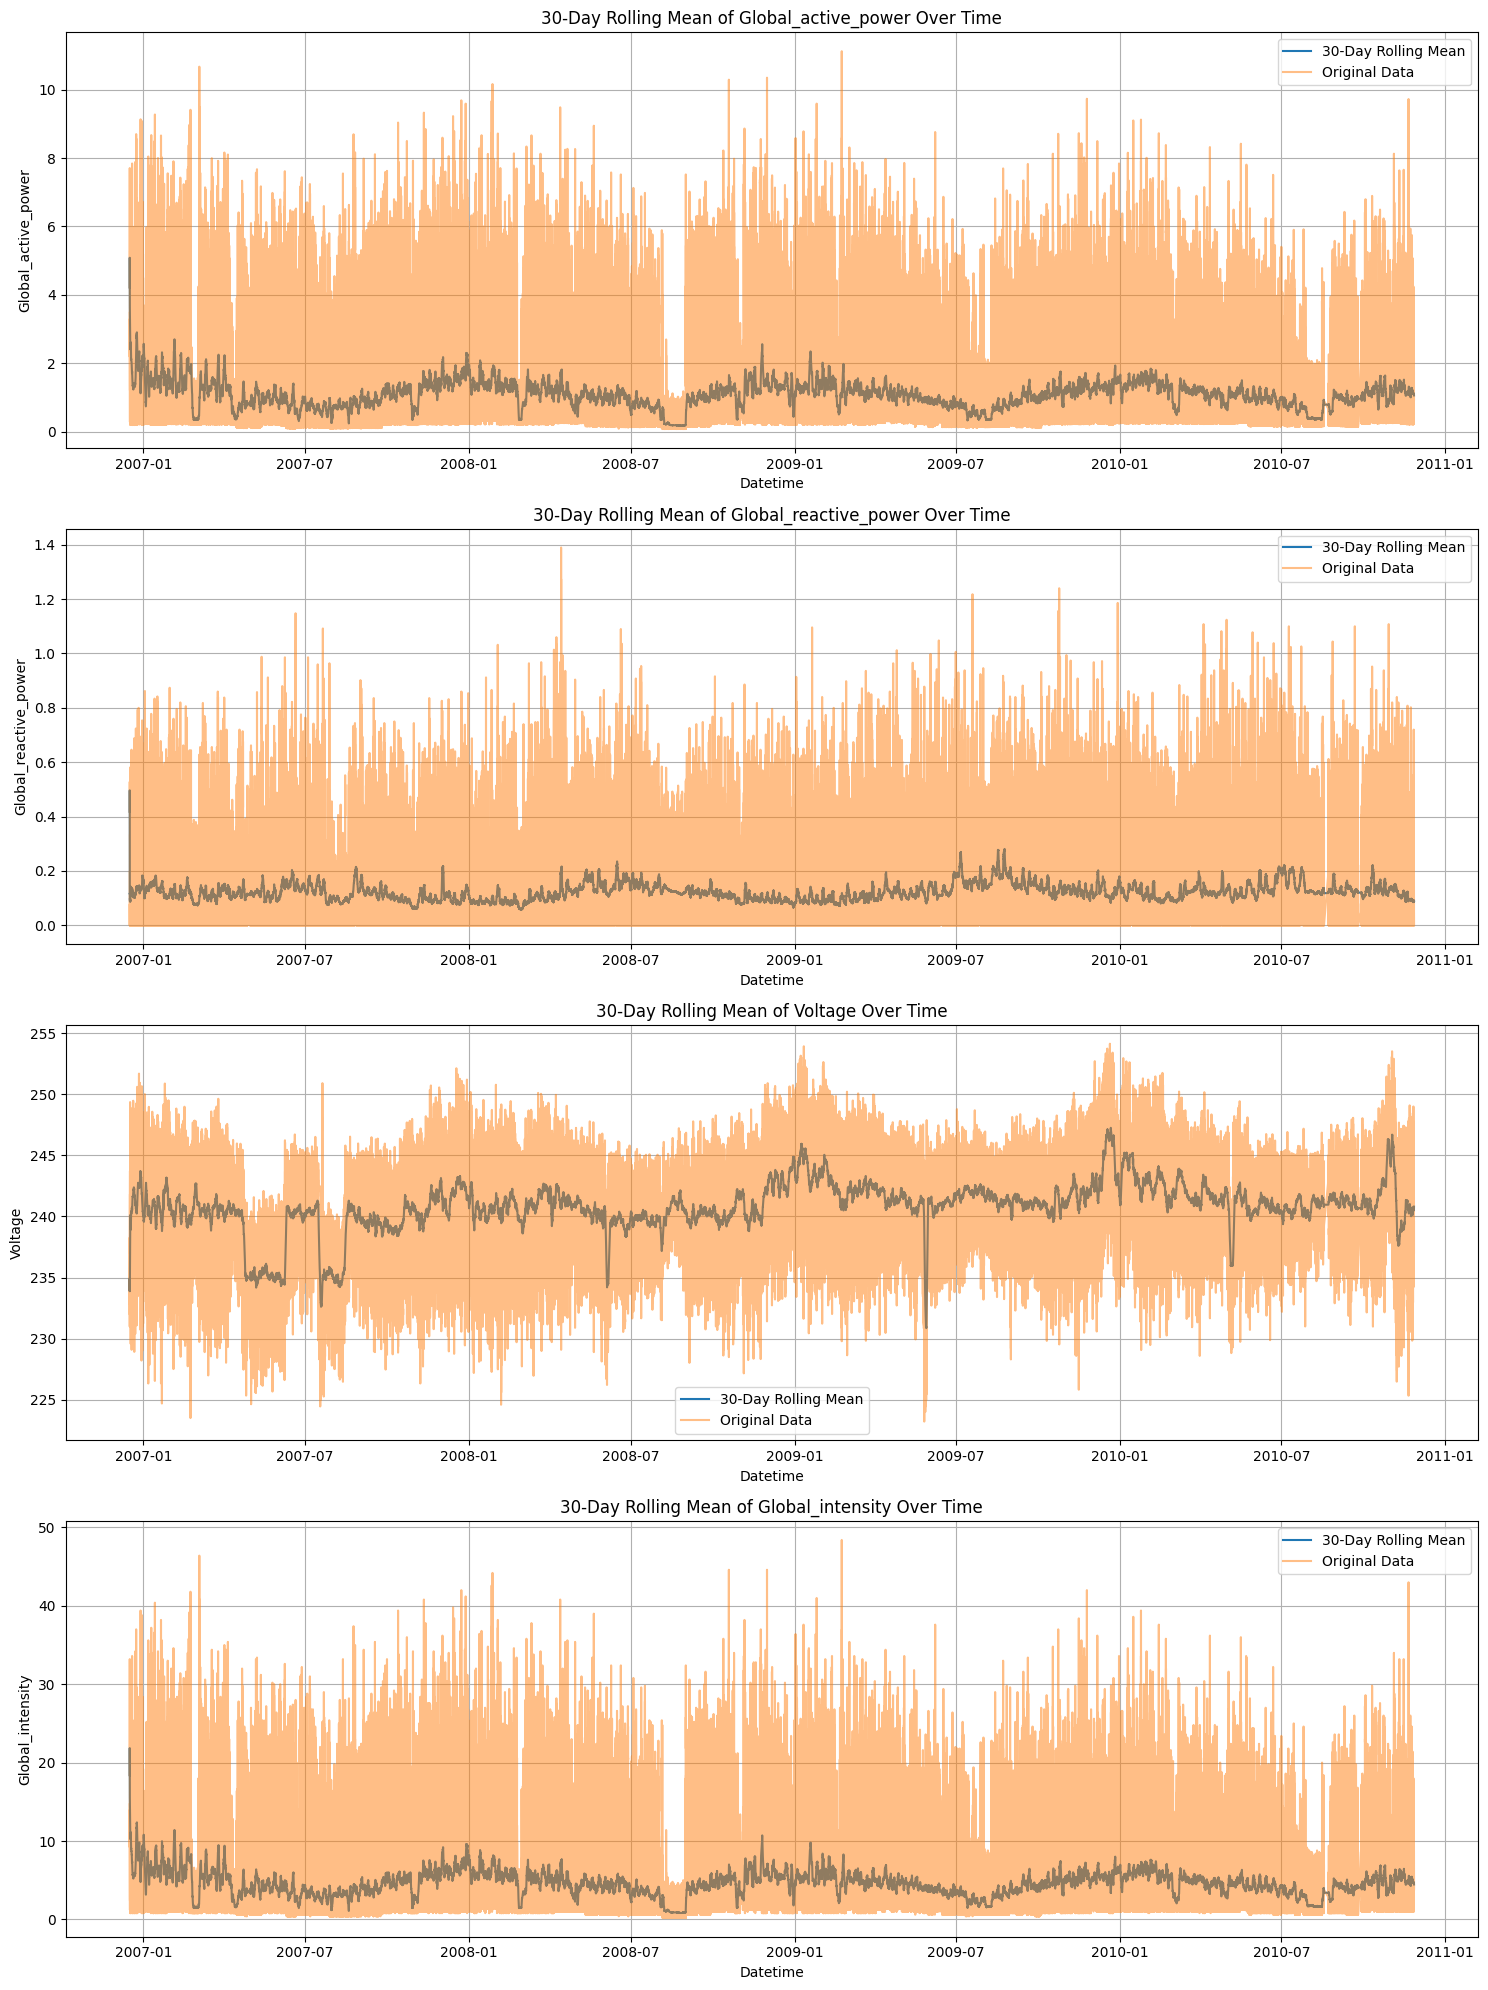

In [ ]:

# Calculate a 30-day rolling mean for selected variables
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
rolling_mean_30d = df[variables_to_plot].rolling(window=2880, min_periods=1).mean() # 2880 data points per 30 days (24 hours * 60 minutes / 10 minutes)

# Create subplots for each variable
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(15, 5 * len(variables_to_plot)))

# Iterate through the selected variables and plot the 30-day rolling means
for i, variable in enumerate(variables_to_plot):
    axes[i].plot(df['Datetime'], rolling_mean_30d[variable], label='30-Day Rolling Mean')
    axes[i].plot(df['Datetime'], df[variable], alpha=0.5, label='Original Data')  # Plot original data for comparison
    axes[i].set_title(f'30-Day Rolling Mean of {variable} Over Time')
    axes[i].set_xlabel('Datetime')
    axes[i].set_ylabel(variable)
    axes[i].legend()  # Add legend to differentiate the lines
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt



# Calculate a 30-day rolling mean for selected variables
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
rolling_mean_30d = df[variables_to_plot].rolling(window=2880, min_periods=1).mean() # 2880 data points per 30 days (24 hours * 60 minutes / 10 minutes)

print(rolling_mean_30d)

         Global_active_power  Global_reactive_power     Voltage  \
0                   4.216000               0.418000  234.840000   
1                   4.788000               0.427000  234.235000   
2                   4.983333               0.450667  233.920000   
3                   5.084500               0.463500  233.875000   
4                   4.800800               0.476400  234.236000   
...                      ...                    ...         ...   
2075254             1.061836               0.087883  240.792924   
2075255             1.061485               0.087883  240.796097   
2075256             1.061134               0.087883  240.799319   
2075257             1.060778               0.087883  240.802316   
2075258             1.060402               0.087850  240.805427   

         Global_intensity  
0               18.400000  
1               20.700000  
2               21.466667  
3               21.850000  
4               20.640000  
...                   ...  

In [ ]:
# Calculate the 30-day moving average, excluding the 'Datetime' column
moving_average_30d = df.drop(columns=['Date','Time', 'Datetime']).rolling(window=48*30, min_periods=1).mean() # 48 readings per day

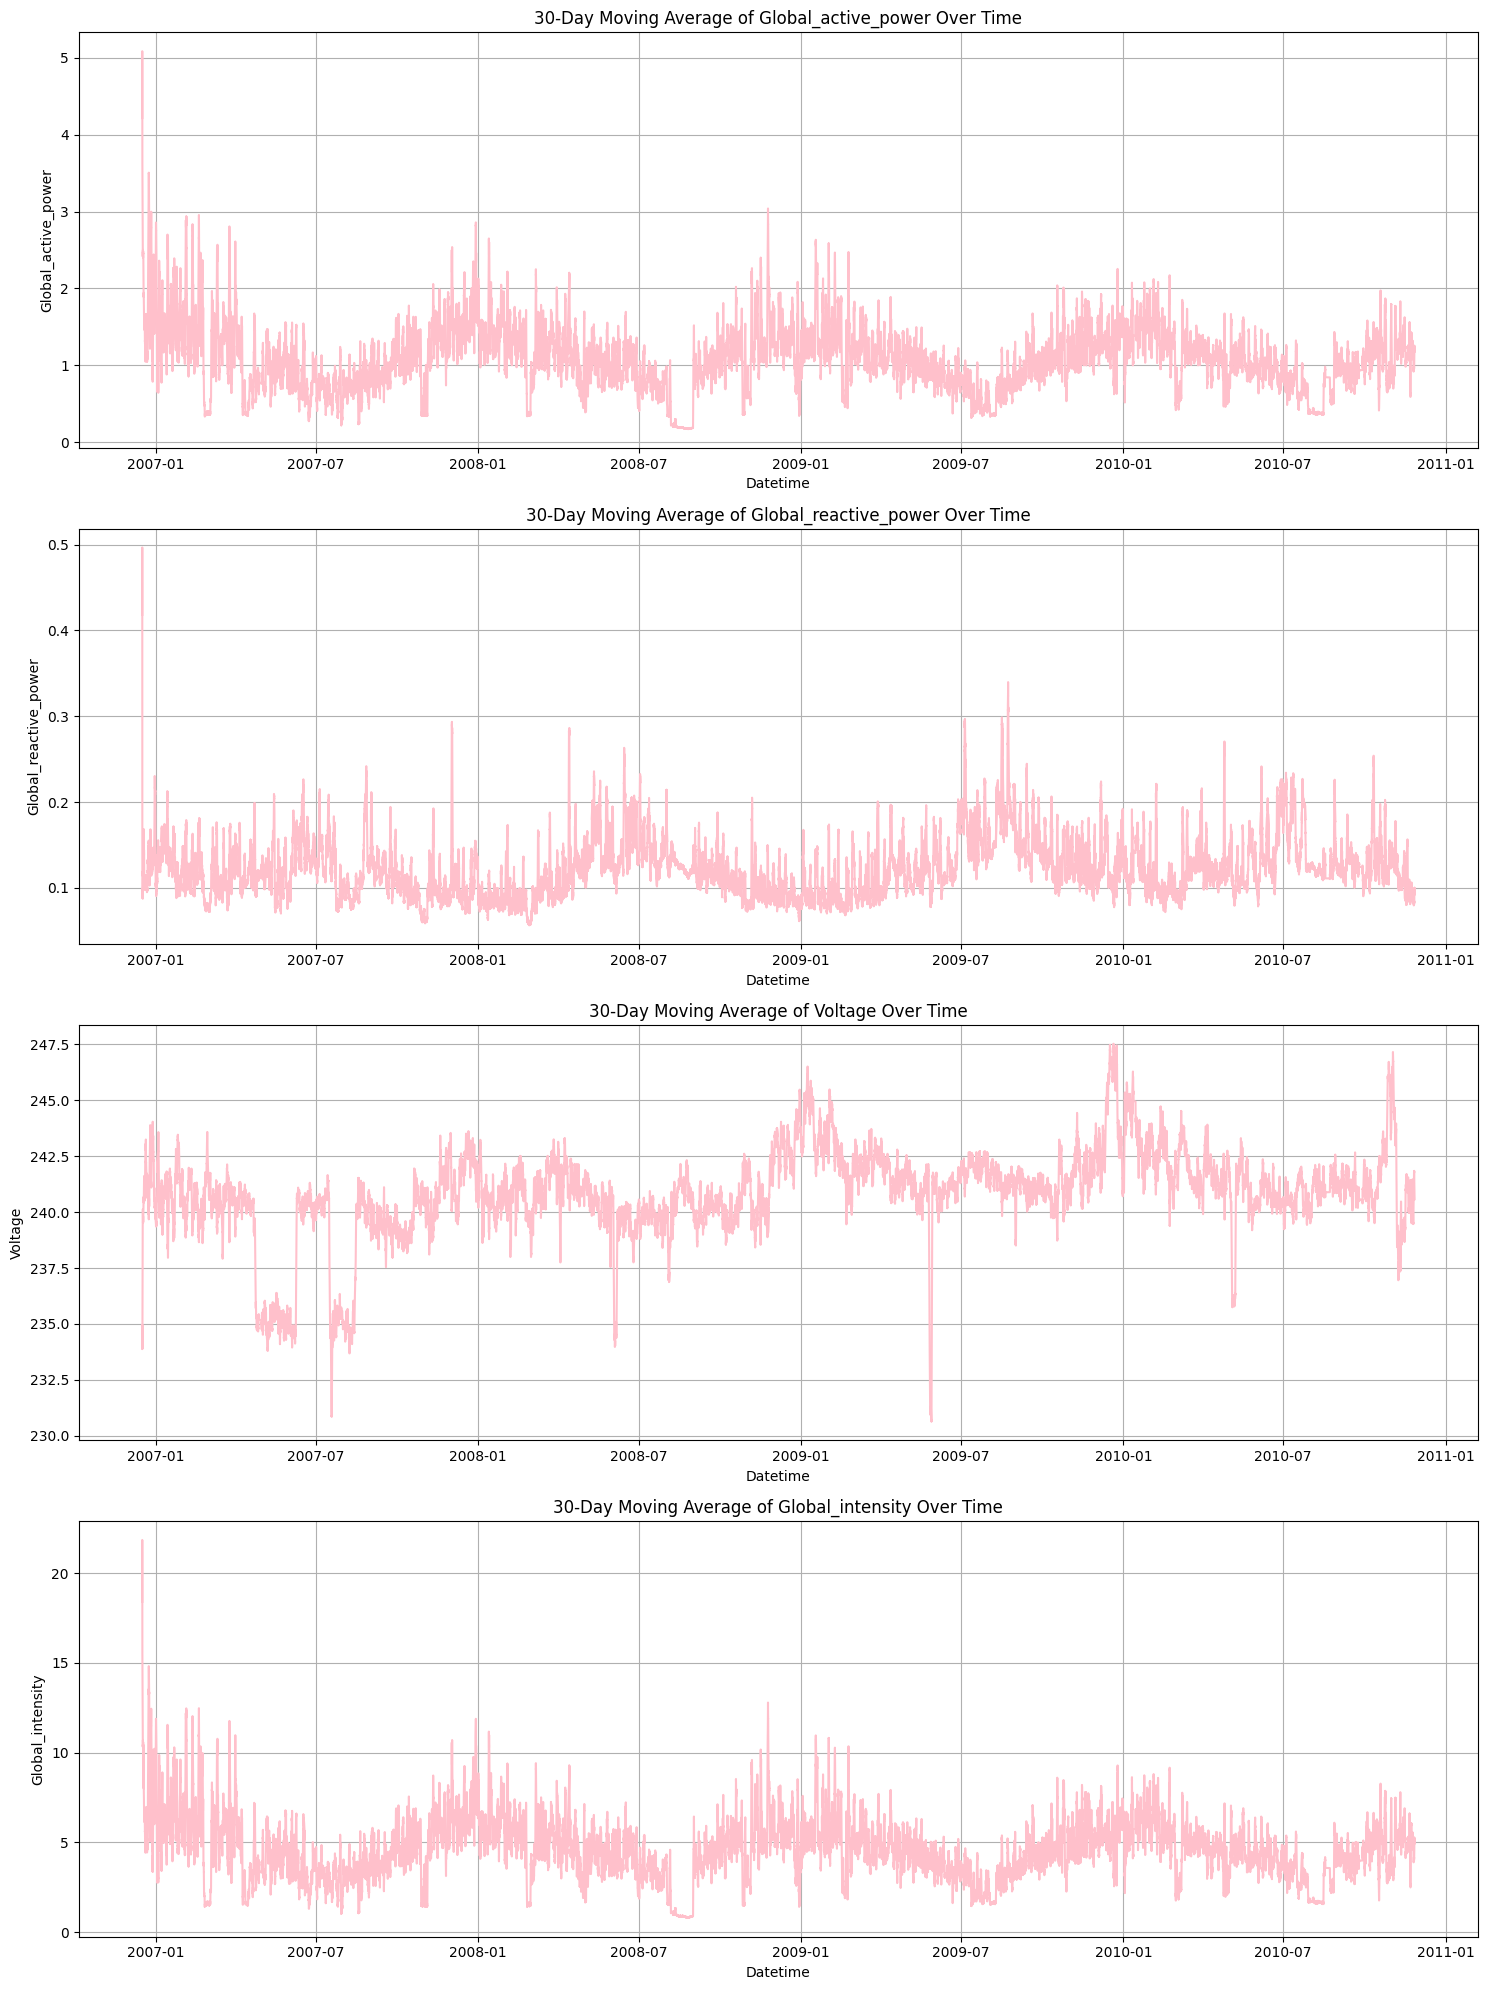

In [ ]:


# Choose four variables to visualize
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create subplots for each variable
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(15, 5 * len(variables_to_plot)))

# Iterate through the selected variables and plot the 30-day moving averages
for i, variable in enumerate(variables_to_plot):
    axes[i].plot(df['Datetime'], moving_average_30d[variable],color='pink')
    axes[i].set_title(f'30-Day Moving Average of {variable} Over Time')
    axes[i].set_xlabel('Datetime')
    axes[i].set_ylabel(variable)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**


A: The moving average and monthly average both smooth out the noise in the original time series data, making underlying trends more apparent. However, they offer different perspectives:
#
 *   **Moving Average:** Provides a more localized view of trends.  A 30-day moving average highlights short-term fluctuations and changes in the data over a shorter period. It's excellent for spotting recent shifts or patterns within a month.
 *   **Monthly Average:** Offers a broader, more summarized view of trends over longer time intervals. It emphasizes seasonal or cyclical patterns that span an entire month. It's less sensitive to day-to-day variations but better for identifying longer-term changes or seasonality.

**Which is more effective?**

**It depends on the analytical goal.**

 *   For detecting recent changes or short-term trends, the **30-day moving average** is generally more informative.
 *   For understanding long-term seasonality or yearly cycles, the **monthly average** is a better choice.

 In some cases, visualizing **both** the moving average and the monthly average on the same plot can provide a comprehensive view of the data, showing both short-term and long-term patterns simultaneously.


## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


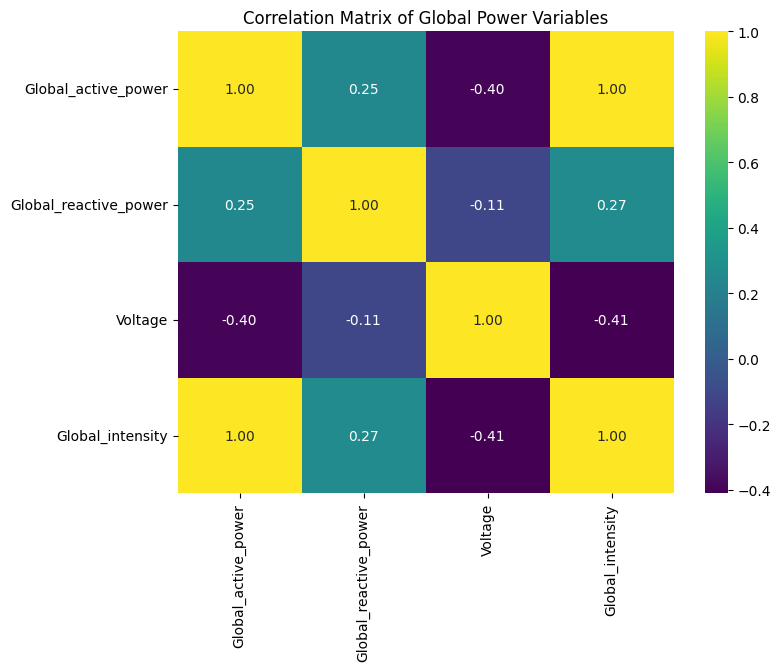

In [ ]:

# ## Data Covariance and Correlation
#
# Let's take a look at the Correlation Matrix for the four global power variables in the dataset.


variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
correlation_matrix = df[variables].corr()
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Global Power Variables')
plt.show()

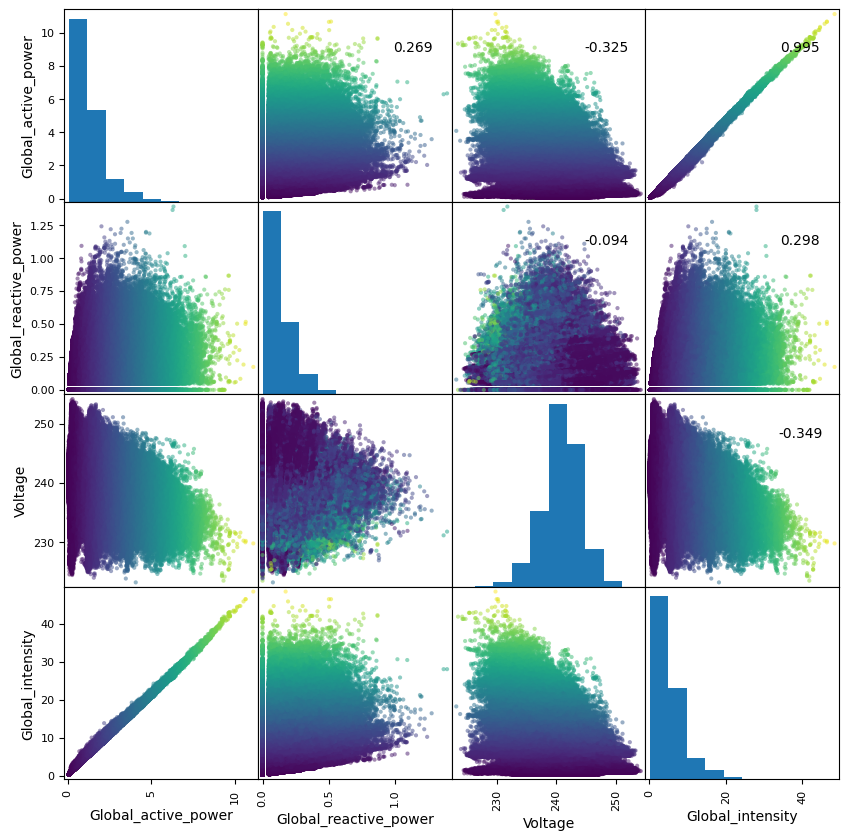

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# (e.g., 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity')

# Instead of a fixed color palette, use a colormap to generate colors based on data values
# For example, you can use 'viridis' colormap:
cmap = 'viridis'

# Create the scatter plot matrix with the colormap
axes = pd.plotting.scatter_matrix(
    df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']],
    alpha=0.5,
    figsize=[10, 10],
    c=df['Global_active_power'],  # Use a column for color mapping
    cmap=cmap  # Apply the colormap
)

corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method='spearman').to_numpy()  # nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" % corr[i, j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

         Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                    18.4             0.0             1.0            17.0   
1                    23.0             0.0             1.0            16.0   


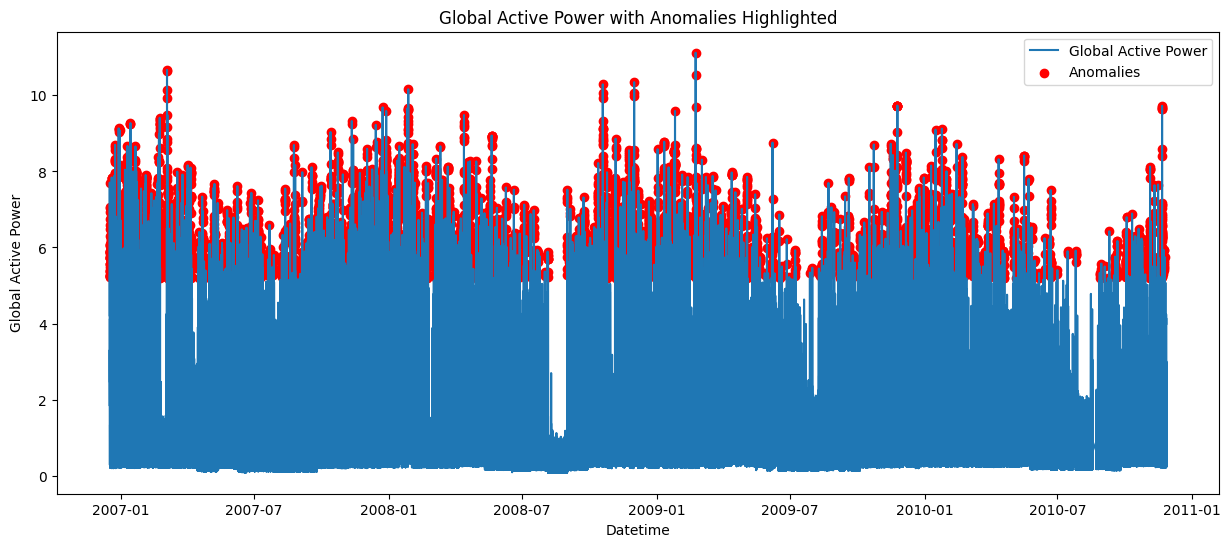

In [ ]:
def detect_anomalies(df, column_name, threshold=3):


    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return ~df[column_name].between(lower_bound, upper_bound)


# Example usage:
variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for variable in variables:
    df[f'{variable}_anomaly'] = detect_anomalies(df, variable)


# Display the DataFrame with the anomaly flags
print(df)

# Visualize the anomalies (example for 'Global_active_power')
plt.figure(figsize=(15, 6))
plt.plot(df['Datetime'], df['Global_active_power'], label='Global Active Power')
plt.scatter(df['Datetime'][df['Global_active_power_anomaly']], df['Global_active_power'][df['Global_active_power_anomaly']], color='red', label='Anomalies')

plt.title('Global Active Power with Anomalies Highlighted')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:
From the moving average, monthly trends, and correlation analysis, we can identify several key patterns:

**1. Seasonal and Daily Trends**
Global Active Power shows periodic fluctuations:

Higher values during peak hours (morning & evening).
Possible seasonal variations across months.
Voltage remains relatively stable:

Small fluctuations but no strong seasonal effect.
Global Intensity and Active Power are highly correlated:

Higher power usage results in higher current draw.
Reactive Power moves inversely to Active Power:

When active power is high, reactive power tends to be lower.
**2. Strong Correlations**
Variable Pair	Correlation	Interpretation
Global Active Power & Global Intensity	0.999	Almost perfectly correlated—intensity increases with power usage.

Global Active Power & Voltage	0.406	Weak correlation, indicating voltage does not significantly fluctuate with power usage.

Global Active Power & Global Reactive Power	-0.494	Inversely related, showing the trade-off between active and reactive power.
Impact on Downstream Tasks

**Forecasting & Energy Demand Planning:**

The strong correlation between Global Active Power and Intensity allows accurate forecasting.
Moving averages and seasonal trends help in predicting peak consumption hours.

 **Anomaly Detection & Outlier Analysis:**

Sudden drops or spikes in voltage or power usage may indicate equipment failure or energy theft.
Comparing **moving averages to real-time data** helps detect unexpected fluctuations.


In [ ]:
#







#










#











#








#

In [ ]:
#







#








#












#

In [ ]:
#











#










#















#














#.   The End

In [ ]:
#


















#










#

In [ ]:
#




















#

In [ ]:
#













#

In [ ]:
#




















#